# Analysis of World Data on crude oil import prices

Here we will show how to analyze worldwide data on crude oil import prices

Some questions we can try to anser
* Which country has the highest import prices
* Which year were import prices the highest
* What are the most recent oil import prices
* What is the trend in price in a certain country
* What is the monthly trend of a certain country in a certain year
* What is the quarterly trend of a certain country in a certain year

Link to Dataset: https://data.oecd.org/energy/crude-oil-import-prices.htm#indicator-chart

This notebook allows us to use numpy and pandas to quickly extract relevant information with 19,852 rows and 8 columns about oil prices

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

First we read the data from 1980 to 2020 by location

In [2]:
df = pd.read_csv('data/Crude_Oil_Import_Prices.csv')
df

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,OILIMPPRICE,TOT,USD_BAR,A,1980,31.81,NaN
1,AUS,OILIMPPRICE,TOT,USD_BAR,A,1981,35.88,NaN
2,AUS,OILIMPPRICE,TOT,USD_BAR,A,1982,35.42,NaN
3,AUS,OILIMPPRICE,TOT,USD_BAR,A,1983,30.88,NaN
4,AUS,OILIMPPRICE,TOT,USD_BAR,A,1984,29.19,NaN
...,...,...,...,...,...,...,...,...
19847,LUX,OILIMPPRICE,TOT,USD_BAR,M,2021-05,NaN,M
19848,LUX,OILIMPPRICE,TOT,USD_BAR,M,2021-06,NaN,M
19849,LUX,OILIMPPRICE,TOT,USD_BAR,M,2021-07,NaN,M
19850,LUX,OILIMPPRICE,TOT,USD_BAR,M,2021-08,NaN,M


# A rough overview of the data

In [3]:
description = df.describe()
description

,Value
count,11039.000000
mean,43.341537
std,30.433644
min,2.330000
25%,18.930000
50%,30.100000
75%,61.270000
max,142.290000


# An overview of all the columns and the Index array

In [4]:
df.columns

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'Value', 'Flag Codes'],
      dtype='object')

# Selecting a subset of rows

In [5]:
d1 = df[df['FREQUENCY'] == 'A']
d1

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,OILIMPPRICE,TOT,USD_BAR,A,1980,31.81,NaN
1,AUS,OILIMPPRICE,TOT,USD_BAR,A,1981,35.88,NaN
2,AUS,OILIMPPRICE,TOT,USD_BAR,A,1982,35.42,NaN
3,AUS,OILIMPPRICE,TOT,USD_BAR,A,1983,30.88,NaN
4,AUS,OILIMPPRICE,TOT,USD_BAR,A,1984,29.19,NaN
...,...,...,...,...,...,...,...,...
19179,LUX,OILIMPPRICE,TOT,USD_BAR,A,2016,NaN,M
19180,LUX,OILIMPPRICE,TOT,USD_BAR,A,2017,NaN,M
19181,LUX,OILIMPPRICE,TOT,USD_BAR,A,2018,NaN,M
19182,LUX,OILIMPPRICE,TOT,USD_BAR,A,2019,NaN,M


# Getting list of locations

In [6]:
locations = df['LOCATION'].unique()
locations

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'IRL', 'ITA', 'JPN', 'KOR', 'NLD', 'NZL', 'NOR', 'POL',
       'PRT', 'SVK', 'ESP', 'SWE', 'CHE', 'TUR', 'GBR', 'USA', 'EST',
       'LUX'], dtype=object)

# Making the plot

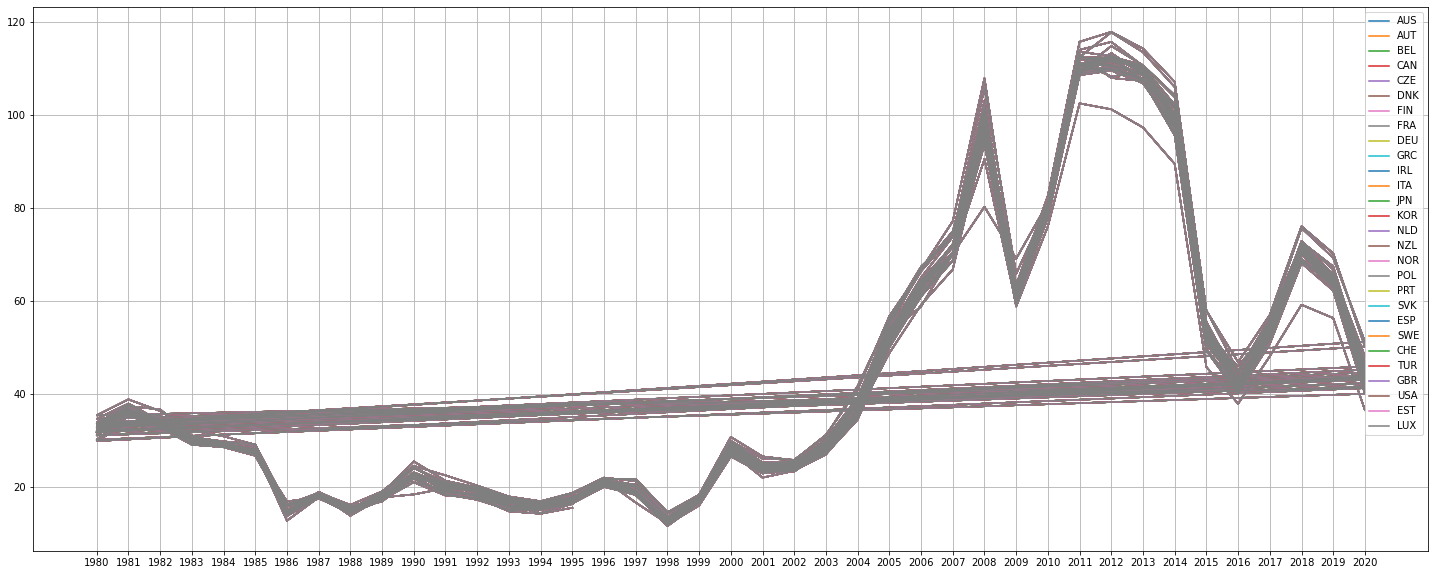

In [7]:
plt.figure(figsize=(25,10))
for location in locations:
    d1 = df[df['FREQUENCY']=='A']
    plt.plot(d1['TIME'], d1['Value'], label = location)
plt.legend()
plt.grid()

# Creating a pivot table from array

In [11]:
column = 'Value_of_crude_oil_imported'

df2 = pd.pivot_table(d1, values="Value", index=["TIME"], columns=["LOCATION"])
df2

LOCATION,AUS,AUT,BEL,CAN,CHE,CZE,DEU,DNK,ESP,FIN,...,KOR,NLD,NOR,NZL,POL,PRT,SVK,SWE,TUR,USA
TIME,,,,,,,,,,,,,,,,,,,,,
1980,31.81,33.66,29.93,30.21,34.68,NaN,33.96,33.56,32.25,NaN,...,NaN,32.80,33.17,32.77,NaN,35.45,NaN,32.22,NaN,33.39
1981,35.88,37.80,33.86,35.28,37.97,NaN,37.09,36.68,35.94,NaN,...,NaN,36.49,36.26,37.42,NaN,38.86,NaN,35.70,NaN,36.69
1982,35.42,33.49,33.58,33.29,34.23,NaN,34.02,33.40,32.84,NaN,...,NaN,33.84,33.64,36.71,NaN,36.37,NaN,33.63,NaN,33.39
1983,30.88,30.66,29.80,29.49,30.25,NaN,30.23,29.90,29.13,NaN,...,NaN,30.10,29.13,31.14,NaN,32.20,NaN,29.77,30.74,29.19
1984,29.19,29.66,28.99,28.75,28.79,NaN,29.31,29.00,28.71,NaN,...,NaN,28.80,28.62,29.15,NaN,30.94,NaN,28.97,29.84,28.60
1985,28.17,28.74,27.47,27.85,27.81,NaN,27.93,28.30,27.15,NaN,...,NaN,27.62,27.57,27.66,NaN,29.15,NaN,27.51,29.25,26.78
1986,14.49,16.28,14.19,16.00,14.28,NaN,14.88,15.83,13.87,NaN,...,NaN,14.38,14.30,16.94,NaN,16.20,NaN,14.67,14.50,14.71
1987,19.00,18.81,17.78,18.59,18.41,NaN,18.32,17.84,18.29,NaN,...,NaN,17.60,18.55,17.91,NaN,18.74,NaN,18.00,18.52,17.73
1988,15.93,16.21,14.85,15.48,15.30,NaN,15.26,14.82,14.42,NaN,...,NaN,14.58,13.89,15.25,NaN,15.62,NaN,14.73,15.14,14.33


# Print all the columns we want

In [12]:
df2[['AUS','USA','CAN']]

LOCATION,AUS,USA,CAN
TIME,,,
1980,31.81,33.39,30.21
1981,35.88,36.69,35.28
1982,35.42,33.39,33.29
1983,30.88,29.19,29.49
1984,29.19,28.60,28.75
1985,28.17,26.78,27.85
1986,14.49,14.71,16.00
1987,19.00,17.73,18.59
1988,15.93,14.33,15.48


# Make plot from pivot table

Text(0.5, 1.0, 'Value_of_crude_oil_imported')

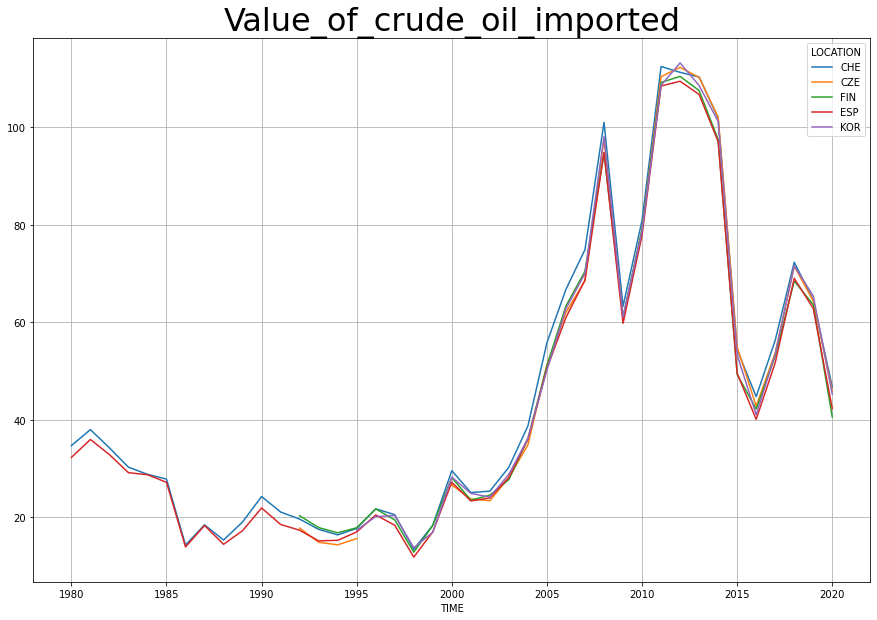

In [14]:
df2[['CHE','CZE','FIN','ESP','KOR']].plot(figsize=(15,10))
plt.grid()
plt.title(column,fontsize=32)

# Finding the year with the highest oil price

Groupby can be used to determine worldwide import cost of oil

In [22]:
d1 = df[df['FREQUENCY']=='A']
years = d1.groupby('TIME')['Value'].agg(sum)
years

TIME
1980     618.99
1981     692.10
1982     647.18
1983     603.39
1984     582.81
1985     557.50
1986     297.40
1987     364.48
1988     300.86
1989     356.06
1990     455.48
1991     399.53
1992     434.89
1993     380.35
1994     363.26
1995     415.54
1996     481.29
1997     448.00
1998     295.57
1999     401.38
2000     681.41
2001     582.57
2002     588.00
2003     693.02
2004     893.24
2005    1255.27
2006    1518.89
2007    1777.36
2008    2531.97
2009    1603.71
2010    2064.17
2011    2875.17
2012    2902.47
2013    2831.29
2014    2591.73
2015    1364.35
2016    1111.01
2017    1395.69
2018    1843.09
2019    1680.17
2020    1143.18
Name: Value, dtype: float64

# Discussion

It is observed that oil import prices peaked in the years 2008, 2012, 2018. 
Furthermore, some of the data is in a straight line as the values at particular times for some countries were "NAN"